<a href="https://colab.research.google.com/github/ammu993/Data-Analysis-using-python-/blob/main/Music_Preferences_Spotify_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ANALYSIS OF REGIONAL MUSIC PREFERENCES (DEC 2023 - JUN 2024) 🎵 🎹


##PROJECT OVERVIEW

This project analyzes the top Spotify songs in 73 countries over a six-month period from December 1, 2023, to June 1, 2024. The aim is to understand the music preferences of Spotify users across different regions: North America, Latin America, Europe, and the Rest of the World. By examining this dataset, we can identify regional daily trends and top artists that define the global music landscape during this period.

The dataset used in this analysis is [Top Spotify Songs in 73 Countries (Daily Updated)](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated/data) provided by user **asaniczka** on Kaggle. This dataset is licensed under the Open Data Commons Attribution License (ODC-By) v1.0.

Explanation to the audio features such as  'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature' can be found in [Annex](https://colab.research.google.com/drive/16BJb85vOJknOSQCfrQ0WXrhRfMnfGg6e#scrollTo=ps6CqN4R2i8f&line=1&uniqifier=1)




---


## ASK


**How did music preferences vary across different regions (North America, Latin America, Europe, and the Rest of the World) on Spotify over the period from December 2023 to June 2024?**

--*What were the trends in the popularity and daily rankings of the top songs globally?*

--*How did the daily rankings of the top songs differ across regions?*

--*Who were the top artists per region, and how often do their songs appear in the top daily ranks?*

--*What regional differences can be observed in the audio characteristics of the most popular songs?*



---

## DATA PREPARATION

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
import seaborn as sns

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
csv_file_path= "/content/drive/MyDrive/universal_top_spotify_songs.csv"

In [94]:
df= pd.read_csv(csv_file_path)
pd.set_option('display.max_columns', None)
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,1,0,0,NaN,2024-06-04,99,True,175459,Espresso,2024-04-12,0.701,0.760,0,-5.478,1,0.0285,0.1070,0.000065,0.1850,0.690,103.969,4
1,2HYFX63wP3otVIvopRS99Z,Houdini,Eminem,2,1,48,NaN,2024-06-04,86,True,227239,Houdini,2024-05-31,0.936,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003,4
2,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,Tommy Richman,3,-1,0,NaN,2024-06-04,99,False,155151,MILLION DOLLAR BABY,2024-04-26,0.849,0.699,1,-5.106,0,0.0436,0.0982,0.000215,0.0680,0.927,138.003,4
3,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,4,0,1,NaN,2024-06-04,95,False,210373,HIT ME HARD AND SOFT,2024-05-17,0.747,0.507,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.438,104.978,4
4,629DixmZGHc7ILtEntuiWE,LUNCH,Billie Eilish,5,0,-3,NaN,2024-06-04,96,False,179586,HIT ME HARD AND SOFT,2024-05-17,0.893,0.400,11,-7.981,0,0.0643,0.0452,0.082300,0.0632,0.945,124.987,4


In [95]:
df.shape

(829103, 25)

In [96]:
df.tail()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
829098,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,310490,For All The Dogs,2023-10-06,0.483,0.408,5,-9.243,0,0.0502,0.5080,0.000000,0.259,0.105,88.880,3
829099,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,173253,SET IT OFF,2023-10-13,0.773,0.635,10,-5.060,1,0.0452,0.0585,0.000000,0.132,0.476,121.879,4
829100,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,184791,People,2022-12-06,0.573,0.422,10,-7.621,0,0.0678,0.5510,0.000013,0.102,0.693,124.357,5
829101,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,179560,Layover,2023-08-11,0.633,0.454,9,-8.016,0,0.0875,0.7390,0.000000,0.148,0.282,74.828,4
829102,59NraMJsLaMCVtwXTSia8i,Prada,"cassö, RAYE, D-Block Europe",50,0,0,AE,2023-10-18,94,True,132359,Prada,2023-08-11,0.638,0.717,8,-5.804,1,0.0375,0.0010,0.000002,0.113,0.422,141.904,4


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829103 entries, 0 to 829102
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          829103 non-null  object 
 1   name                829076 non-null  object 
 2   artists             829076 non-null  object 
 3   daily_rank          829103 non-null  int64  
 4   daily_movement      829103 non-null  int64  
 5   weekly_movement     829103 non-null  int64  
 6   country             817896 non-null  object 
 7   snapshot_date       829103 non-null  object 
 8   popularity          829103 non-null  int64  
 9   is_explicit         829103 non-null  bool   
 10  duration_ms         829103 non-null  int64  
 11  album_name          828819 non-null  object 
 12  album_release_date  828819 non-null  object 
 13  danceability        829103 non-null  float64
 14  energy              829103 non-null  float64
 15  key                 829103 non-nul

In [98]:
df.columns

Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

## DATA PROCESSING


### Data Cleaning


In [99]:
df.isna().sum()

spotify_id                0
name                     27
artists                  27
daily_rank                0
daily_movement            0
weekly_movement           0
country               11207
snapshot_date             0
popularity                0
is_explicit               0
duration_ms               0
album_name              284
album_release_date      284
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

In [100]:
#Replacing null values in the country column
df.country=df.country.replace("NaN",np.nan)
df.country=df.country.replace(np.nan,"Global")

In [101]:
df.isnull().sum()

spotify_id              0
name                   27
artists                27
daily_rank              0
daily_movement          0
weekly_movement         0
country                 0
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name            284
album_release_date    284
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

In [102]:
#Viewing part of dataset with album_name is NULL
df.loc[df.album_name.isnull()]

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1187,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,Van Morrison,38,0,8,NZ,2024-06-04,85,False,183306,NaN,NaN,0.491,0.583,7,-10.964,1,0.0376,0.1850,0.000,0.4060,0.908,150.566,4
2092,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,Van Morrison,43,0,7,IE,2024-06-04,85,False,183306,NaN,NaN,0.491,0.583,7,-10.964,1,0.0376,0.1850,0.000,0.4060,0.908,150.566,4
4837,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,Van Morrison,38,0,10,NZ,2024-06-03,85,False,183306,NaN,NaN,0.491,0.583,7,-10.964,1,0.0376,0.1850,0.000,0.4060,0.908,150.566,4
5742,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,Van Morrison,43,-1,7,IE,2024-06-03,85,False,183306,NaN,NaN,0.491,0.583,7,-10.964,1,0.0376,0.1850,0.000,0.4060,0.908,150.566,4
6096,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,Van Morrison,47,3,3,GB,2024-06-03,85,False,183306,NaN,NaN,0.491,0.583,7,-10.964,1,0.0376,0.1850,0.000,0.4060,0.908,150.566,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747955,0kvD9ksvXyRHANPypIpkIh,NaN,NaN,43,7,7,EC,2023-11-09,0,True,0,NaN,NaN,0.716,0.824,0,-4.588,1,0.0497,0.0124,0.000,0.0906,0.541,89.991,4
748210,0kvD9ksvXyRHANPypIpkIh,NaN,NaN,48,2,2,CR,2023-11-09,0,True,0,NaN,NaN,0.716,0.824,0,-4.588,1,0.0497,0.0124,0.000,0.0906,0.541,89.991,4
748299,0kvD9ksvXyRHANPypIpkIh,NaN,NaN,37,13,13,CL,2023-11-09,0,True,0,NaN,NaN,0.716,0.824,0,-4.588,1,0.0497,0.0124,0.000,0.0906,0.541,89.991,4
748549,0kvD9ksvXyRHANPypIpkIh,NaN,NaN,37,13,13,BO,2023-11-09,0,True,0,NaN,NaN,0.716,0.824,0,-4.588,1,0.0497,0.0124,0.000,0.0906,0.541,89.991,4


In [103]:
df=df.dropna(subset=['album_name','album_release_date'])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 828819 entries, 0 to 829102
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          828819 non-null  object 
 1   name                828819 non-null  object 
 2   artists             828819 non-null  object 
 3   daily_rank          828819 non-null  int64  
 4   daily_movement      828819 non-null  int64  
 5   weekly_movement     828819 non-null  int64  
 6   country             828819 non-null  object 
 7   snapshot_date       828819 non-null  object 
 8   popularity          828819 non-null  int64  
 9   is_explicit         828819 non-null  bool   
 10  duration_ms         828819 non-null  int64  
 11  album_name          828819 non-null  object 
 12  album_release_date  828819 non-null  object 
 13  danceability        828819 non-null  float64
 14  energy              828819 non-null  float64
 15  key                 828819 non-null  in

In [105]:
df.drop_duplicates()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2qSkIjg1o9h3YT9RAgYN75,Espresso,Sabrina Carpenter,1,0,0,Global,2024-06-04,99,True,175459,Espresso,2024-04-12,0.701,0.760,0,-5.478,1,0.0285,0.1070,0.000065,0.1850,0.690,103.969,4
1,2HYFX63wP3otVIvopRS99Z,Houdini,Eminem,2,1,48,Global,2024-06-04,86,True,227239,Houdini,2024-05-31,0.936,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003,4
2,7fzHQizxTqy8wTXwlrgPQQ,MILLION DOLLAR BABY,Tommy Richman,3,-1,0,Global,2024-06-04,99,False,155151,MILLION DOLLAR BABY,2024-04-26,0.849,0.699,1,-5.106,0,0.0436,0.0982,0.000215,0.0680,0.927,138.003,4
3,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,4,0,1,Global,2024-06-04,95,False,210373,HIT ME HARD AND SOFT,2024-05-17,0.747,0.507,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.438,104.978,4
4,629DixmZGHc7ILtEntuiWE,LUNCH,Billie Eilish,5,0,-3,Global,2024-06-04,96,False,179586,HIT ME HARD AND SOFT,2024-05-17,0.893,0.400,11,-7.981,0,0.0643,0.0452,0.082300,0.0632,0.945,124.987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829098,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,310490,For All The Dogs,2023-10-06,0.483,0.408,5,-9.243,0,0.0502,0.5080,0.000000,0.2590,0.105,88.880,3
829099,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,173253,SET IT OFF,2023-10-13,0.773,0.635,10,-5.060,1,0.0452,0.0585,0.000000,0.1320,0.476,121.879,4
829100,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,184791,People,2022-12-06,0.573,0.422,10,-7.621,0,0.0678,0.5510,0.000013,0.1020,0.693,124.357,5
829101,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,179560,Layover,2023-08-11,0.633,0.454,9,-8.016,0,0.0875,0.7390,0.000000,0.1480,0.282,74.828,4


In [106]:
len(df.country.unique())

73

In [107]:
#To get list of country ISO codes mentioned in the data set
array_countries=df['country'].unique()
country_list=array_countries.tolist()


In [108]:
#Function to allocate regions from country information
def country_to_region(data):
  #Regions dictionary containing values as the ISO codes of countries
  regions_dict={ "Europe": [
        "AT", "BE", "BG", "BY", "CH", "CZ", "DE", "DK", "EE", "ES",
        "FI", "FR", "GB", "GR", "HU", "IE", "IS", "IT", "LT", "LU",
        "LV", "NL", "NO", "PL", "PT", "RO", "SE", "SK", "UA"
    ],
    "North America": [
        "CA", "US"
    ],
    "Latin America": [
        "AR", "BO", "BR", "CL", "CO", "CR", "DO", "EC", "GT", "HN",
        "MX", "NI", "PA", "PE", "PY", "SV", "UY", "VE"
    ],
    "Rest of World": [
        "AE", "AU", "EG", "HK", "ID", "IL", "IN", "JP", "KR", "KZ",
        "MA", "MY", "NG", "NZ", "PH", "PK", "SA", "SG", "TH", "TR",
        "TW", "VN", "ZA"
    ]}
  if data['country'] == 'Global':
    return 'Global'
  elif data['country'] in regions_dict['Europe']:
    return 'Europe'
  elif data['country'] in regions_dict['Rest of World']:
    return 'Rest of World'
  elif data['country'] in regions_dict['Latin America'] :
    return 'LATAM'
  elif data['country'] in regions_dict['North America'] :
    return 'North America'

modified_df = df
modified_df['regions']= modified_df.apply(country_to_region, axis='columns')


In [109]:
#Deleting the spotify id column
modified_df=modified_df.drop (columns='spotify_id')

In [110]:
df = modified_df

In [111]:
#Converting the data type of columns with dates
df['album_release_date'] = pd.to_datetime(df['album_release_date'], format='%Y-%m-%d')
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'], format='%Y-%m-%d')

### EDA

In [112]:
#Summary statistics for numerical and string data types
df.describe(include=[np.number,object])

,name,artists,daily_rank,daily_movement,weekly_movement,country,popularity,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,regions
count,828819,828819,828819.000000,828819.000000,828819.000000,828819,828819.000000,828819.000000,828819,828819.000000,828819.000000,828819.000000,828819.000000,828819.000000,828819.000000,828819.000000,828819.000000,828819.000000,828819.000000,828819.000000,828819.000000,828819
unique,10500,7130,NaN,NaN,NaN,73,NaN,NaN,7928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,greedy,Taylor Swift,NaN,NaN,NaN,DO,NaN,NaN,nadie sabe lo que va a pasar mañana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
freq,8175,15944,NaN,NaN,NaN,11475,NaN,NaN,15042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328644
mean,NaN,NaN,25.482082,0.898865,2.918870,NaN,77.403215,193469.425128,NaN,0.681783,0.648722,5.438729,-6.512051,0.538428,0.097077,0.277238,0.017083,0.173149,0.539126,122.575241,3.895203,NaN
std,NaN,NaN,14.427143,7.055312,12.415326,NaN,15.986937,51036.577305,NaN,0.138819,0.164348,3.539398,2.643814,0.498521,0.091535,0.254630,0.092480,0.126598,0.229572,28.398242,0.434246,NaN
min,NaN,NaN,1.000000,-49.000000,-49.000000,NaN,0.000000,33986.000000,NaN,0.000000,0.000020,0.000000,-37.334000,0.000000,0.000000,0.000008,0.000000,0.014500,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,13.000000,-1.000000,-3.000000,NaN,66.000000,160740.000000,NaN,0.588000,0.545000,2.000000,-7.877000,0.000000,0.040000,0.071200,0.000000,0.096800,0.362000,99.986000,4.000000,NaN
50%,NaN,NaN,25.000000,0.000000,0.000000,NaN,81.000000,185917.000000,NaN,0.701000,0.670000,6.000000,-6.092000,1.000000,0.059000,0.185000,0.000001,0.120000,0.538000,119.984000,4.000000,NaN
75%,NaN,NaN,38.000000,2.000000,5.000000,NaN,89.000000,218658.000000,NaN,0.788000,0.764000,9.000000,-4.772000,1.000000,0.114000,0.437000,0.000074,0.212000,0.726000,141.904000,4.000000,NaN


In [113]:
#Summary statistics for numerical and string data types
df.describe(include=np.datetime64)

,snapshot_date,album_release_date
count,828819,828819
mean,2024-02-09 04:28:10.067432448,2021-10-21 07:19:58.410268416
min,2023-10-18 00:00:00,1900-01-01 00:00:00
25%,2023-12-13 00:00:00,2023-02-24 00:00:00
50%,2024-02-08 00:00:00,2023-09-13 00:00:00
75%,2024-04-07 00:00:00,2023-12-12 00:00:00
max,2024-06-04 00:00:00,2024-06-03 00:00:00


In [114]:
#to see correlation between numeric values
corr_matrix= df.corr(numeric_only=True)

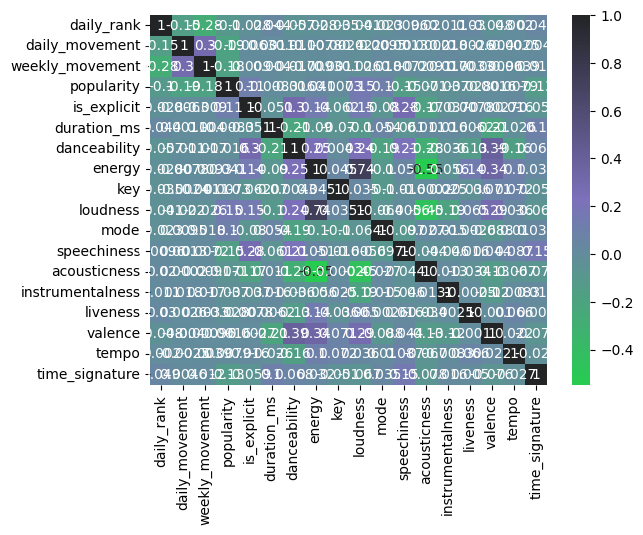

<Figure size 2000x1000 with 0 Axes>

In [115]:
custom_palette= ['#26CC50','#7C71BB','#222426']# Hex Color values correspond to green,purple,grey
cmap = LinearSegmentedColormap.from_list("custom", custom_palette, N=256)
sns.heatmap(corr_matrix,annot=True, cmap=cmap)
plt.rcParams['figure.figsize']=(20,10)
plt.show()
plt.tight_layout()

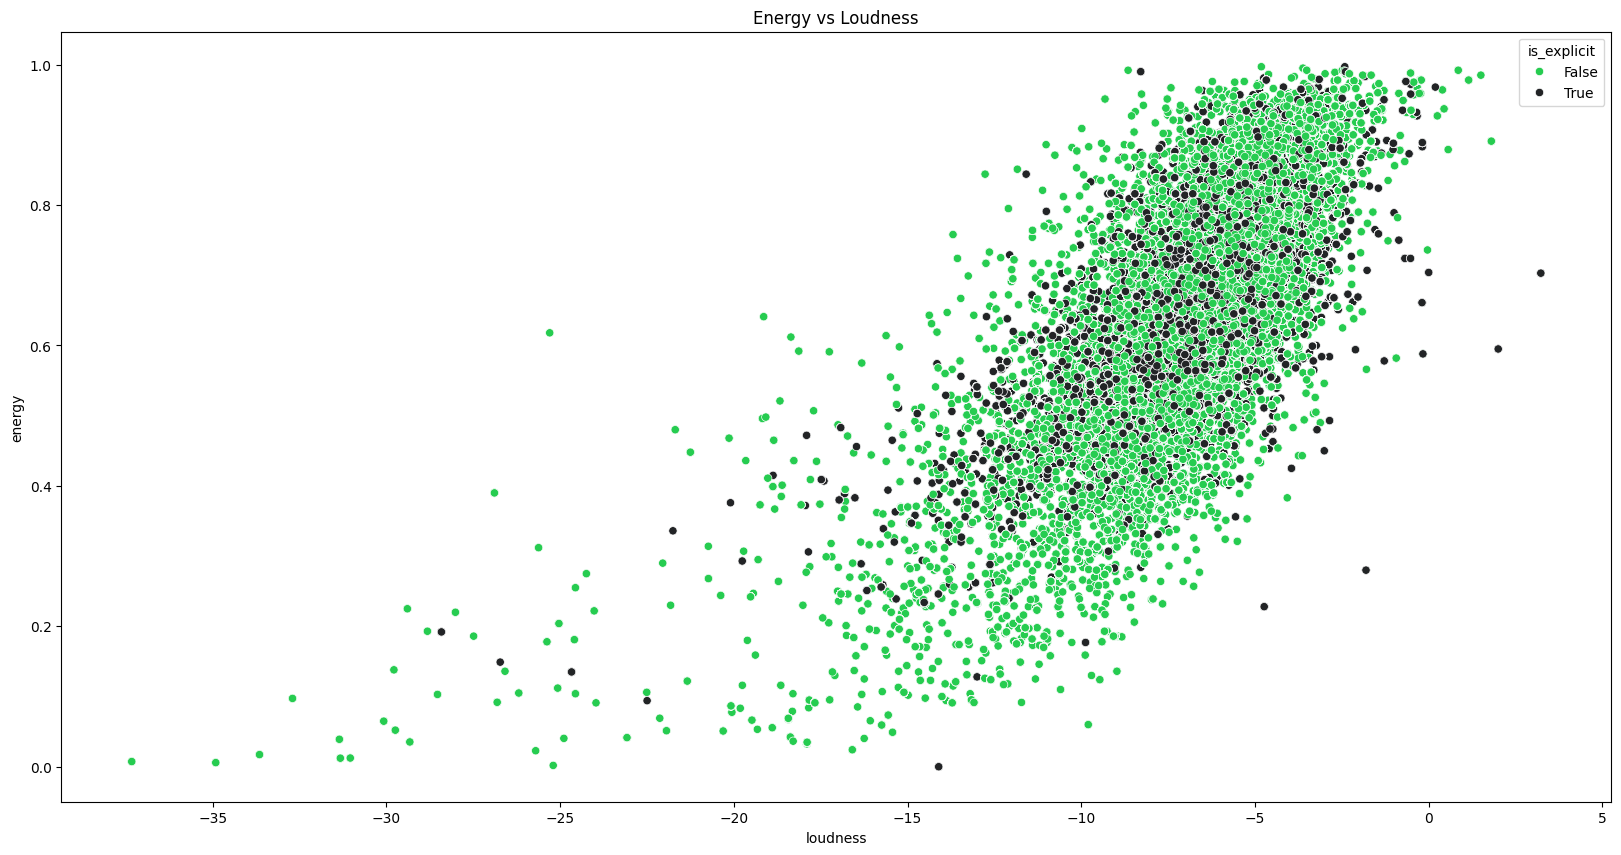

<Figure size 1600x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [116]:
sns.scatterplot(y=df['energy'],x=df['loudness'],hue=df['is_explicit'],palette=['#26CC50','#222426'])
plt.title('Energy vs Loudness')
plt.figure(figsize=(16,10))
plt.show()
plt.tight_layout()

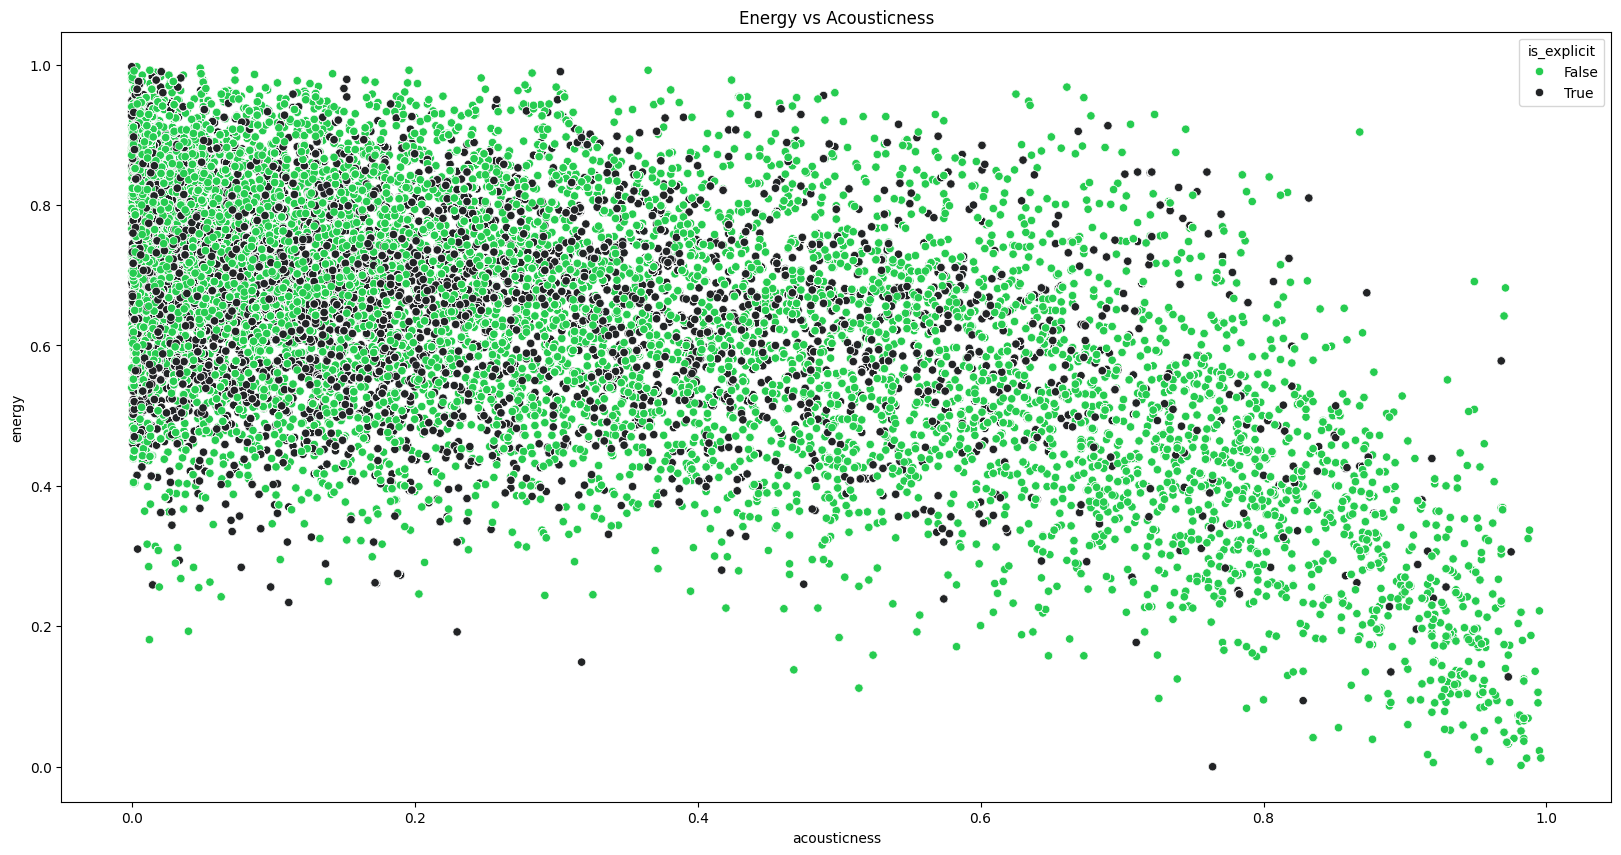

<Figure size 1600x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [117]:
sns.scatterplot(y=df['energy'],x=df['acousticness'],hue=df['is_explicit'],palette=['#26CC50','#222426'])
plt.title('Energy vs Acousticness')
plt.figure(figsize=(16,10))
plt.show()
plt.tight_layout()

## ANALYSIS
The main aim  of this section is to answer the research question:

**How did music preferences vary across different regions (North America, Latin America, Europe, and the Rest of the World) on Spotify over the period from December 2023 to June 2024?**


In [118]:
#Filtering for last 6 months of data
df_2024 = df[(df['snapshot_date'] >= '2023-12-01') & (df['snapshot_date'] < '2024-06-01')]

### What are the trends in the popularity and daily rankings of the top songs globally?

*   How does the popularity score trend of the top 5 globally ranked songs compare over the six-month period?
*   How do the daily ranking trends of these top 5 songs change over time?



In [119]:
#Filtering the data frame to get top song that always ranked between 1-15 globally
top_songs_2024= df_2024.loc[(df_2024.country=='Global') & (df_2024.daily_rank<=15)]

In [120]:
#Selecting top 5 globally trending song which had daily ranks between 1-15
top5dailyrank = top_songs_2024.name.value_counts().head(5)
top5dailyrank=top5dailyrank.reset_index()
top5dailyrank

,name,count
0,greedy,140
1,Cruel Summer,134
2,"One Of The Girls (with JENNIE, Lily Rose Depp)",116
3,Beautiful Things,114
4,My Love Mine All Mine,111


In [121]:
songs_array = top5dailyrank['name'].values
songs_top5 = songs_array.tolist()
# Convert the array to a list
# songs_top5 = []
# for row in top5dailyrank.index:
#   song= top5dailyrank.iloc[row,0]
#   songs_top5.append(song)
# songs_top5

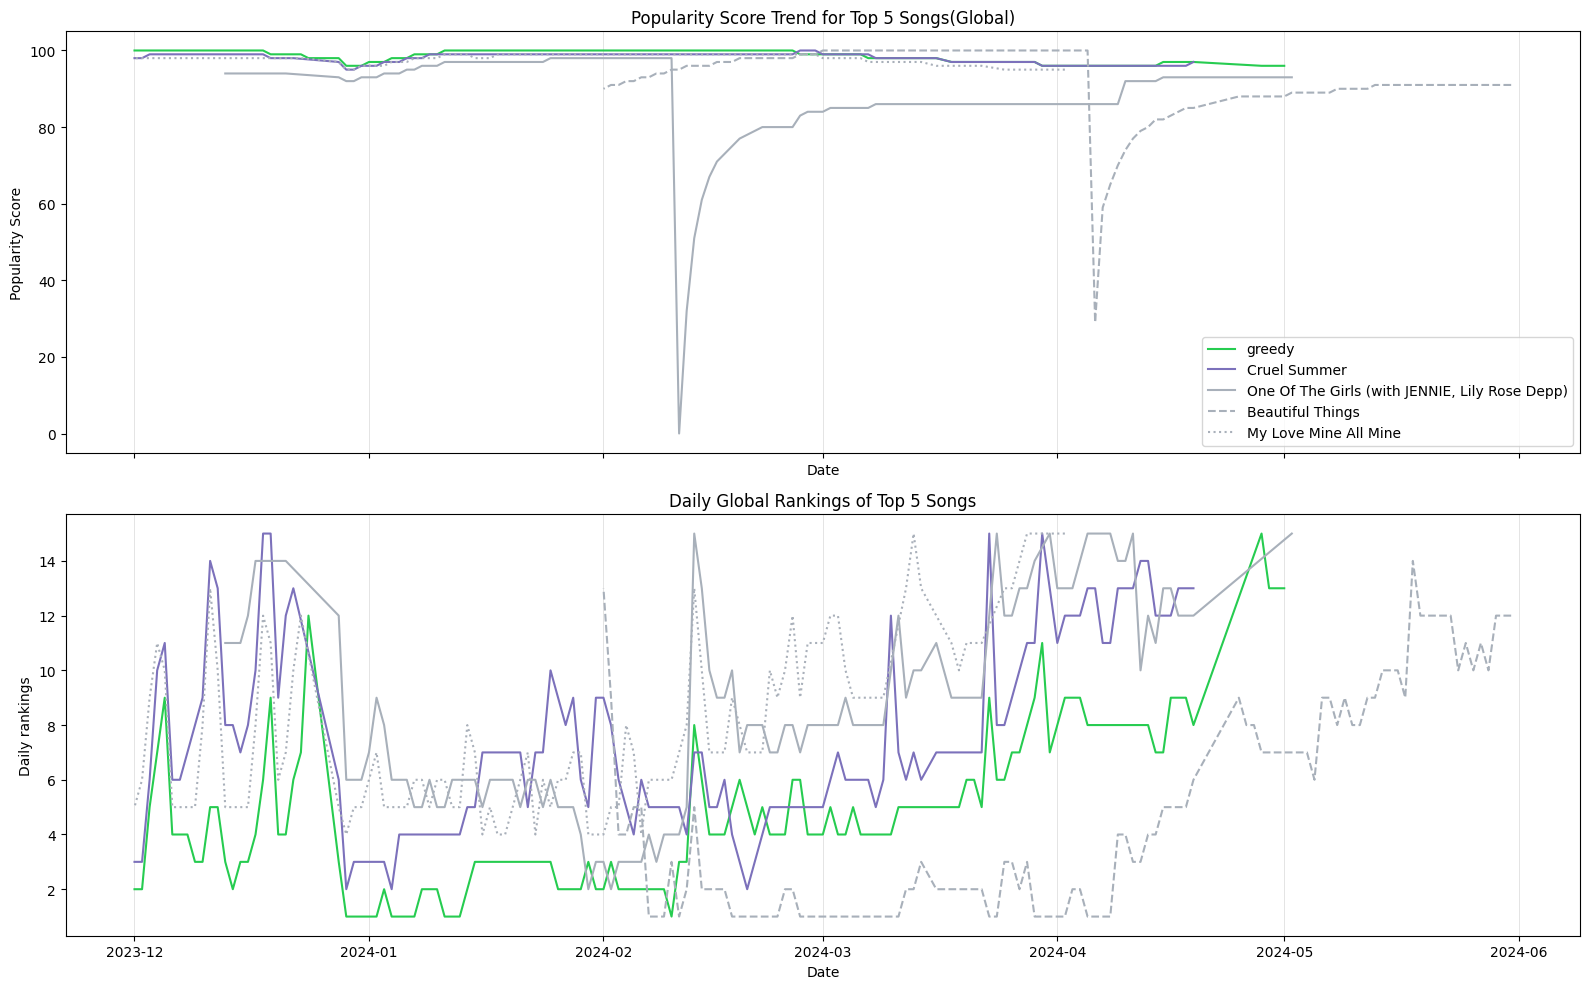

In [122]:
#Plotting popularity score and daily rank trend of top 5 songs
colors=['#26CC50','#7C71BB' ,'#A8B0BA','#A8B0BA','#A9B0BA']
linestyles = ['-', '-', '-', '--', ':']
plt.style.use('default')

# Figure with two subplots
fig, (ax1,ax2) = plt.subplots(figsize=(16, 10),nrows=2, ncols=1, sharex=True)

# Plotting each song's popularity score trend
for i, song in enumerate(songs_top5):
     song_data = top_songs_2024[top_songs_2024['name'] == song]
     ax1.plot(song_data['snapshot_date'], song_data['popularity'],color=colors[i],linestyle=linestyles[i], label=song)
# Plotting each song's daily ranking trend
for i, song in enumerate(songs_top5):
    song_data = top_songs_2024[top_songs_2024['name'] == song]
    ax2.plot(song_data['snapshot_date'], song_data['daily_rank'],color=colors[i],linestyle=linestyles[i], label=song)

#Popularity trend
ax1.set_xlabel('Date')
ax1.set_ylabel('Popularity Score')
ax1.set_title('Popularity Score Trend for Top 5 Songs(Global)')
ax1.legend(fontsize='medium',loc='lower right')
ax1.grid(axis= 'x',color='grey', linestyle='-', linewidth=0.5, alpha=0.3)
#Daily rankings
ax2.set_xlabel('Date')
ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax2.set_ylabel('Daily rankings')
ax2.set_title('Daily Global Rankings of Top 5 Songs')
ax2.grid(axis= 'x',color='grey', linestyle='-', linewidth=0.5, alpha=0.3)
plt.tight_layout()


### How do the daily rankings of the top songs differ across regions?

*   What are the daily ranking trends of the top songs in North America, Latin America, Europe, and the Rest of the World?
*   Can seasonal/monthly music preferences across the regions be observed?



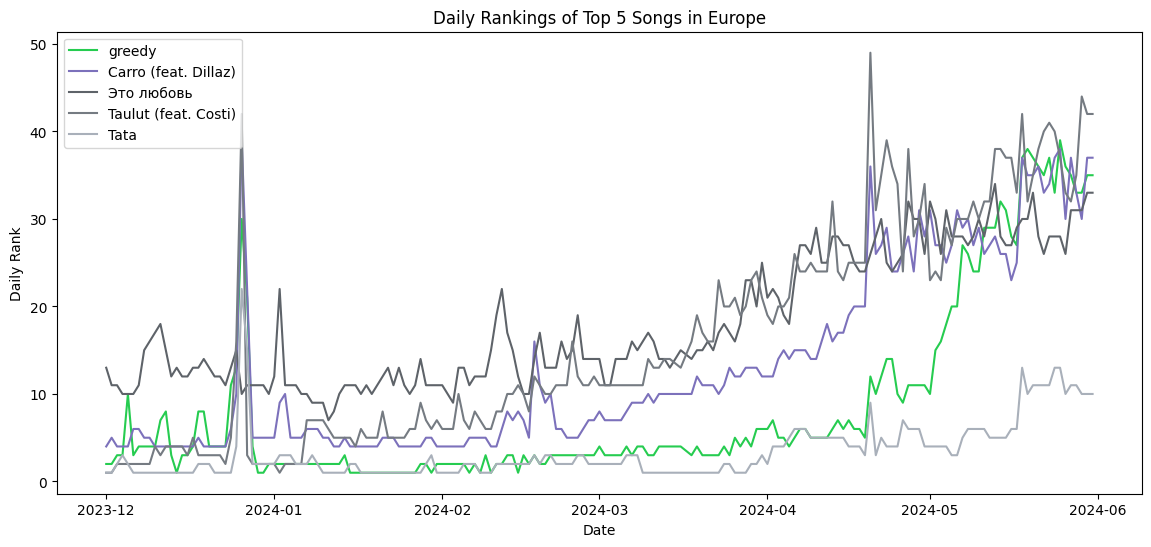

<Figure size 640x480 with 0 Axes>

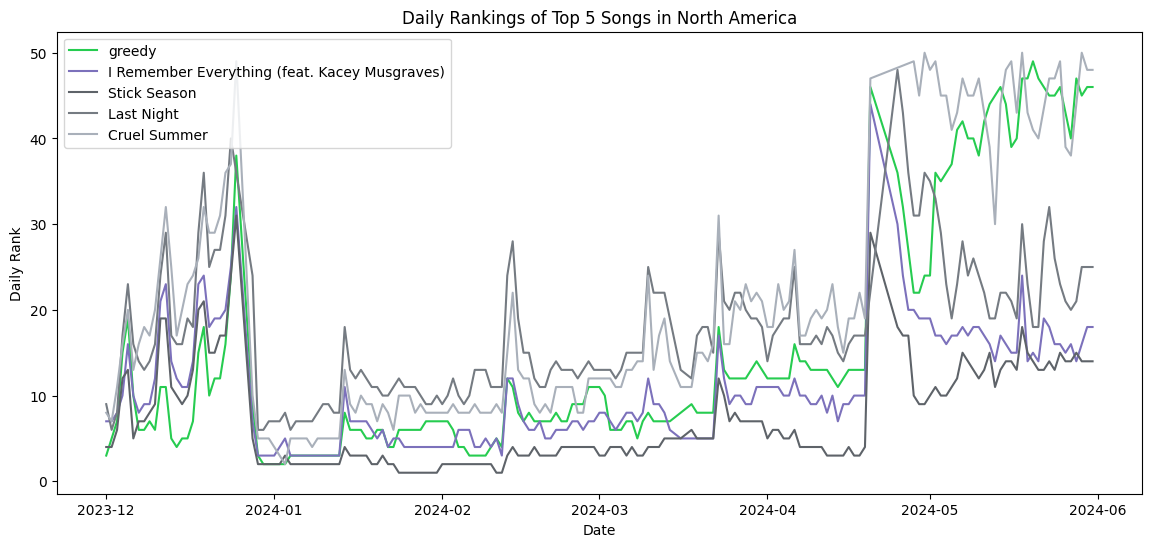

<Figure size 640x480 with 0 Axes>

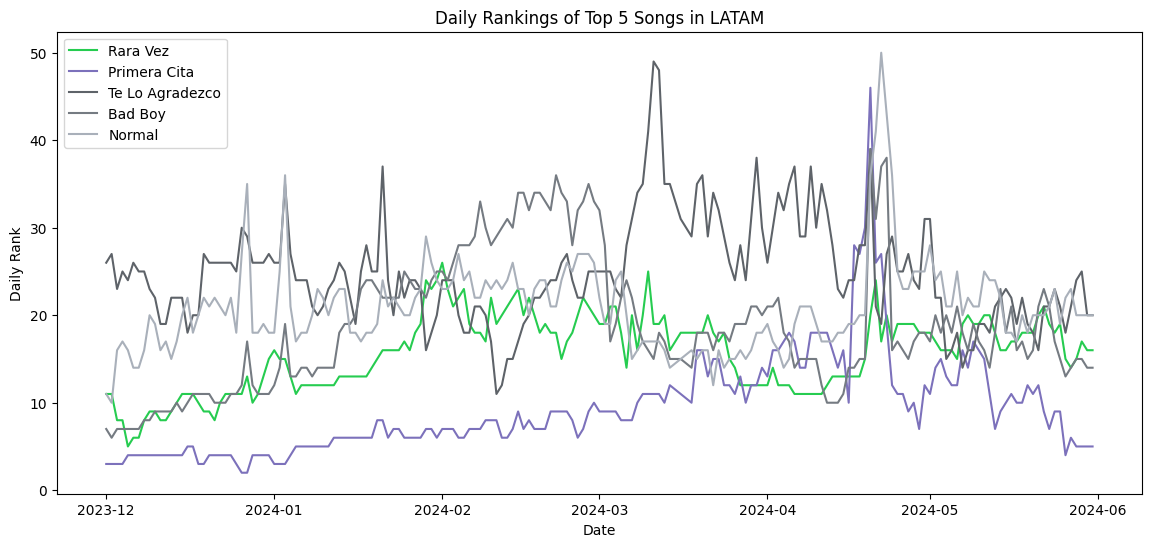

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28858 (\N{CJK UNIFIED IDEOGRAPH-70BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

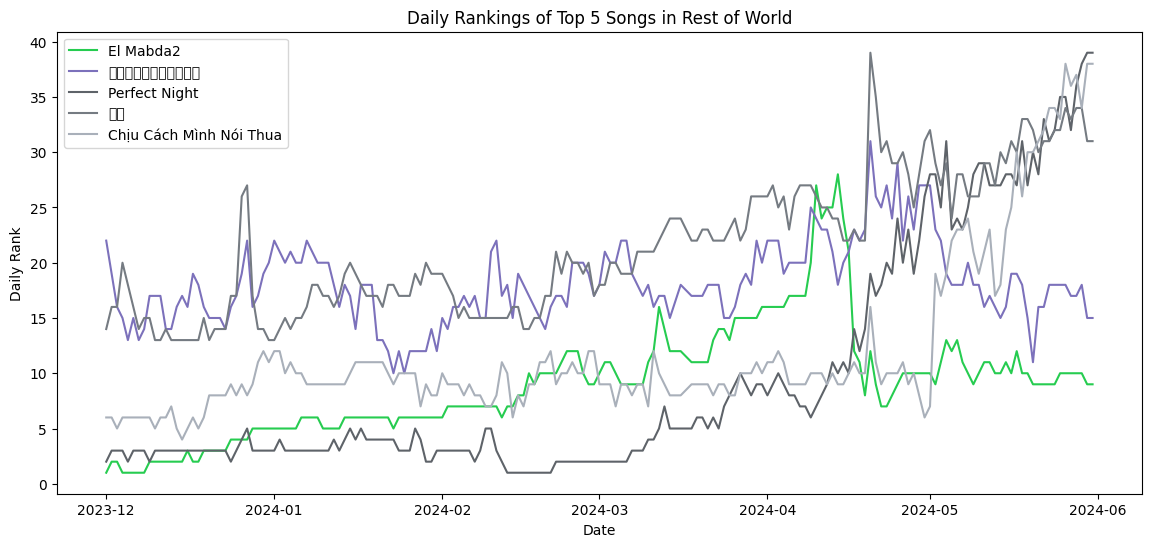

<Figure size 640x480 with 0 Axes>

In [123]:
colors=['#26CC50','#7C71BB' ,'#5E6369','#757B82','#A9B0BA']

# Function to create line charts for daily rankings
def plot_daily_rankings(region, top_n):
    # Filter the data for the given region
    regional_data = df_2024[df_2024['regions'] == region]

    # Grouping the data by song name and snapshot_date
    grouped = regional_data.groupby(['name', 'snapshot_date'])['daily_rank'].min().reset_index()

    # Select the top N songs based on the minimum daily rank
    top_songs = grouped['name'].value_counts().head(top_n).index

    # Plotting the daily trend
    fig, ax = plt.subplots(figsize=(14, 6))
    for i,song in enumerate(top_songs):
        song_data = grouped.loc[grouped['name'] == song]
        ax.plot(song_data['snapshot_date'], song_data['daily_rank'],color=colors[i] ,label=song)

    ax.set_title(f'Daily Rankings of Top {top_n} Songs in {region}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Rank')
    ax.legend(loc='upper left')
    plt.show()
    plt.tight_layout()

plot_daily_rankings('Europe',5)
plot_daily_rankings('North America',5)
plot_daily_rankings('LATAM',5)
plot_daily_rankings('Rest of World',5)


### Music preference based on Artists : Who are the top artists per region, and how often do their songs appear in the top daily ranks?

*   Which artists have the most songs appearing in the top 50 daily ranks in each region?
*   Which artists' songs consistently occupy one of the top 10 positions in the daily ranks in each region?


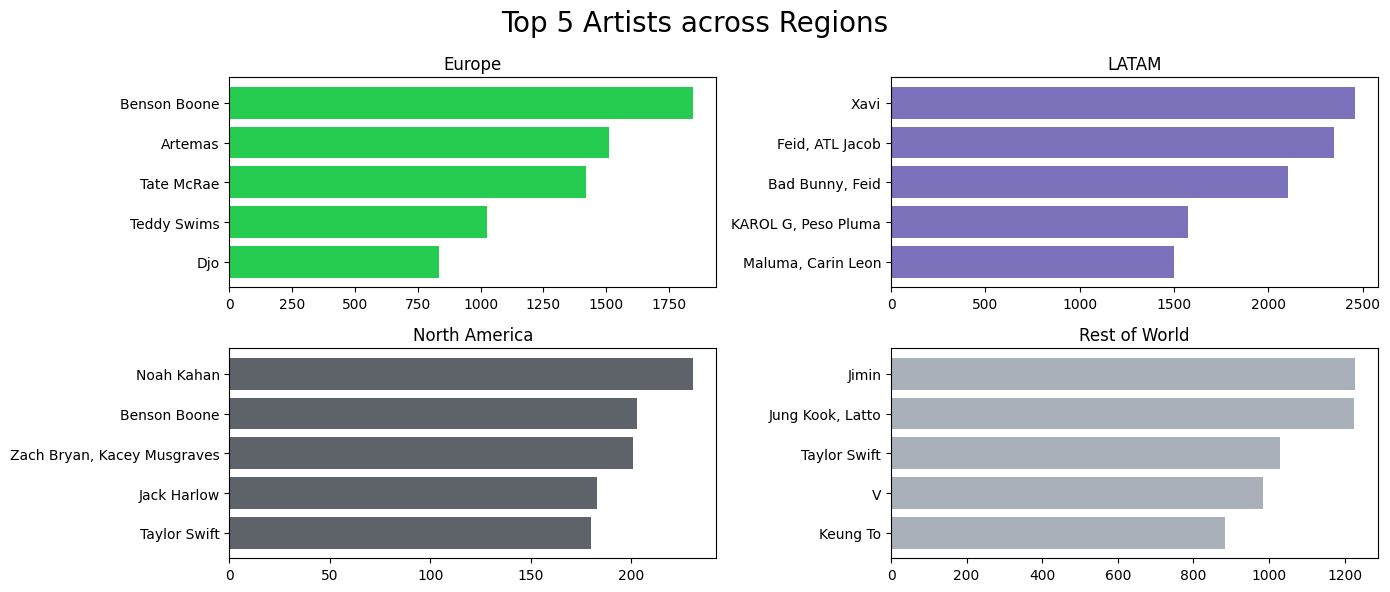

In [124]:
# Top_Region_Artists are artists whose songs appeared multiple times in the top 50 daily ranks for the specific region, considering only artists whose songs have occupied one of the top 10 positions in the daily ranks consistently.
top_eu_artists= df_2024.artists.loc[(df_2024.regions=='Europe')& (df_2024.daily_rank<=10)].value_counts().head(5)
top_latam_artists= df_2024.artists.loc[(df_2024.regions=='LATAM')& (df_2024.daily_rank<=10)].value_counts().head(5)
top_NorthAm_artists= df_2024.artists.loc[(df_2024.regions=='North America')& (df_2024.daily_rank<=10)].value_counts().head(5)
top_rest_artists= df_2024.artists.loc[(df_2024.regions=='Rest of World')& (df_2024.daily_rank<=10)].value_counts().head(5)

#To sort the appearance of bars in descending order
top_eu_artists=top_eu_artists.iloc[::-1]
top_latam_artists=top_latam_artists.iloc[::-1]
top_NorthAm_artists=top_NorthAm_artists.iloc[::-1]
top_rest_artists=top_rest_artists.iloc[::-1]

#Plotting horizontal bar charts for top 5 artists across regions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(14, 6))
plt.suptitle('Top 5 Artists across Regions', fontsize=20)
ax1.barh(top_eu_artists.index,top_eu_artists.values,color="#26CC50")
ax1.set_title('Europe')
ax2.barh(top_latam_artists.index,top_latam_artists.values,color="#7C71BB")
ax2.set_title('LATAM')
ax3.barh(top_NorthAm_artists.index,top_NorthAm_artists.values,color="#5E6369")
ax3.set_title('North America')
ax4.barh(top_rest_artists.index,top_rest_artists.values,color="#A9B0BA")
ax4.set_title('Rest of World')
plt.tight_layout()


###Music preferences based on song features: What regional differences can be observed in the audio characteristics of the most popular songs?

*   How do audio features (danceability', 'energy', 'key', 'loudness' etc) of top songs compare across different regions?



In [125]:
#Function to list top n songs within a region based on their minimum daily rankings
def top_music(df1,region, top_n):
    # Filter the data for the given region
    regional_data = df1[df1['regions'] == region]

    # Grouping the data by song name and snapshot_date
    grouped = regional_data.groupby(['name', 'snapshot_date'])['daily_rank'].min().reset_index()

    # Select the top N songs based on the minimum daily rank
    top_songs = grouped['name'].value_counts().head(top_n).reset_index()
    top_songs_list = top_songs['name'].tolist()
    return top_songs_list

#List of audio features (excluding time_signature,mode) including basic song info
song_features=['name','artists','album_release_date','is_explicit', 'key','loudness','danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']


In [126]:
#Top 5 songs in Europe alongwith their song features
df_europe = df_2024.loc[df_2024['name'].isin(top_music(df_2024,'Europe', 10))]
top_eu__musicfeatures= df_europe.loc[:,song_features].groupby('name').min().sort_values(by='danceability', ascending=False)
top_eu__musicfeatures
# top_eu__musicfeatures.boxplot(figsize=(20,10))

,artists,album_release_date,is_explicit,key,loudness,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,,,,,
Я щаслива - Лікарі кажуть,Klavdia Petrivna,2023-09-22,False,10,-11.013,0.925,0.472,0.1700,0.7470,0.000023,0.0897,0.705,107.021
Покохай мене,"Chico, Qatoshi, 100лиця",2023-11-12,False,0,-5.451,0.855,0.888,0.2170,0.0261,0.000000,0.2490,0.871,124.987
Lost Angeles,FRIENDLY THUG 52 NGG,2023-11-03,True,7,-9.738,0.788,0.544,0.3240,0.1410,0.000000,0.0947,0.411,75.474
Знайди мене,Klavdia Petrivna,2023-09-22,False,7,-12.208,0.759,0.464,0.0577,0.7120,0.446000,0.2150,0.143,109.974
greedy,Tate McRae,2023-09-15,True,6,-3.190,0.749,0.729,0.0319,0.2560,0.000000,0.1130,0.816,111.004
Taulut (feat. Costi),"HUGO, Costi",2023-09-08,False,6,-5.982,0.743,0.742,0.0721,0.1520,0.000046,0.3700,0.459,129.973
Carro (feat. Dillaz),"Bárbara Bandeira, Dillaz",2023-10-06,False,3,-7.113,0.733,0.530,0.0338,0.6600,0.000000,0.1420,0.470,114.972
Tata,Slow J,2023-11-24,False,5,-4.836,0.571,0.718,0.4250,0.7710,0.029800,0.1040,0.491,92.023
Lose Control,Teddy Swims,2023-09-15,False,9,-4.409,0.561,0.604,0.0337,0.1990,0.000019,0.1040,0.242,159.920


In [127]:
df_NorthAm= df_2024.loc[df_2024['name'].isin(top_music(df_2024,'North America', 10))]
top_NorthAm_musicfeatures= df_NorthAm.loc[:,song_features].groupby('name').min().sort_values(by='danceability', ascending=False)
top_NorthAm_musicfeatures
# top_NorthAm_musicfeatures.boxplot(figsize=(20,10))

,artists,album_release_date,is_explicit,key,loudness,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,,,,,
Lovin On Me,Jack Harlow,2023-11-10,True,2,-4.911,0.943,0.558,0.0568,0.0026,0.000002,0.0937,0.606,104.983
greedy,Tate McRae,2023-09-15,True,6,-3.190,0.749,0.729,0.0319,0.2560,0.000000,0.1130,0.816,111.004
Fast Car,Luke Combs,1988-04-05,False,4,-15.523,0.711,0.292,0.0262,0.1860,0.000000,0.1150,0.194,97.994
Stick Season,Noah Kahan,2022-10-14,False,9,-6.935,0.662,0.488,0.0651,0.7820,0.000000,0.0966,0.801,117.896
FE!N (feat. Playboi Carti),"Travis Scott, Playboi Carti",2023-07-28,True,3,-2.777,0.569,0.882,0.0600,0.0316,0.000000,0.1420,0.201,148.038
Lose Control,Teddy Swims,2023-09-15,False,9,-4.409,0.561,0.604,0.0337,0.1990,0.000019,0.1040,0.242,159.920
Cruel Summer,Taylor Swift,2019-08-23,False,9,-5.707,0.552,0.702,0.1570,0.1170,0.000021,0.1050,0.564,169.994
Last Night,Morgan Wallen,2023-03-03,True,6,-5.456,0.492,0.673,0.0347,0.4130,0.000000,0.1370,0.478,203.759
I Remember Everything (feat. Kacey Musgraves),"Zach Bryan, Kacey Musgraves",2023-08-25,False,0,-7.746,0.429,0.453,0.0459,0.5540,0.000002,0.1020,0.155,77.639


In [128]:
df_Latin= df_2024.loc[df_2024['name'].isin(top_music(df_2024,'LATAM', 10))]
top_LATAM_musicfeatures= df_Latin.loc[:,song_features].groupby('name').min().sort_values(by='danceability', ascending=False)
top_LATAM_musicfeatures
# top_LATAM_musicfeatures.boxplot(figsize=(20,10))

,artists,album_release_date,is_explicit,key,loudness,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,,,,,
CLASSY 101,"Feid, Young Miko",2023-03-31,True,11,-4.790,0.858,0.658,0.1520,0.1260,0.000000,0.1190,0.659,100.065
Es un Secreto,Plan B,2010-07-20,False,6,-4.963,0.841,0.774,0.0421,0.1060,0.000002,0.0528,0.494,94.989
Rara Vez,"Taiu, Milo j",2023-02-08,False,5,-4.668,0.838,0.708,0.1660,0.1760,0.000000,0.3430,0.960,119.984
La Morocha,"Luck Ra, BM",2023-07-07,False,7,-5.752,0.753,0.768,0.0340,0.0954,0.000000,0.2790,0.971,149.099
Ya No Vuelvas (Versión Cuarteto),"Luck Ra, La K'onga, Ke Personajes",2022-12-01,False,1,-4.575,0.736,0.900,0.0825,0.2210,0.000000,0.3750,0.554,149.945
Normal,Feid,2022-09-14,True,4,-4.867,0.709,0.560,0.1710,0.0340,0.000000,0.3150,0.541,170.082
O Me Voy O Te Vas,Natanael Cano,2023-10-11,False,8,-10.702,0.684,0.509,0.0397,0.0760,0.000000,0.0533,0.796,99.240
Bad Boy,"Bad Gyal, Ñengo Flow",2023-11-10,False,10,-7.653,0.577,0.513,0.0541,0.0266,0.000000,0.0883,0.502,172.020
Te Lo Agradezco,"Kany García, Carin Leon",2023-07-27,False,7,-3.976,0.549,0.584,0.1470,0.3010,0.000000,0.1090,0.594,179.839


In [129]:
df_rest= df_2024.loc[df_2024['name'].isin(top_music(df_2024,'Rest of World', 10))]
top_rest_musicfeatures= df_rest.loc[:,song_features].groupby('name').min().sort_values(by='danceability', ascending=False)
top_rest_musicfeatures
# top_rest_musicfeatures.boxplot(figsize=(20,10))

,artists,album_release_date,is_explicit,key,loudness,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,,,,,
اختياراتي - من فيلم مستر إكس,Ahmed Saad,2023-06-20,False,11,-3.873,0.850,0.800,0.0410,0.0688,0.000000,0.1490,0.846,119.985
El Mabda2,Marwan Pablo,2023-11-27,False,9,-6.050,0.797,0.614,0.0616,0.3790,0.000000,0.1220,0.363,111.989
An Thần,"Low G, Thắng",2021-10-21,False,6,-7.266,0.758,0.773,0.2140,0.6310,0.000002,0.1140,0.907,169.996
MONEY,Anson Lo 盧瀚霆,2021-09-10,False,1,-9.998,0.729,0.554,0.1070,0.0758,0.000000,0.0637,0.396,99.999
Perfect Night,LE SSERAFIM,2023-10-27,False,5,-4.502,0.697,0.820,0.0308,0.1000,0.000000,0.0631,0.502,136.054
Chịu Cách Mình Nói Thua,"RHYDER, CoolKid, BAN",2023-11-22,False,10,-6.757,0.604,0.698,0.0348,0.1460,0.000000,0.1090,0.341,154.061
Heaven Knows - This Angel Has Flown,Orange & Lemons,2005-03-24,False,4,-8.443,0.582,0.506,0.0274,0.2690,0.000064,0.0994,0.464,93.340
不是因為天氣晴朗才愛你,理想混蛋,2018-08-06,False,8,-13.185,0.507,0.271,0.0347,0.7530,0.000001,0.0883,0.399,135.783
再見 寧靜海,陳卓賢 Ian,2023-01-18,False,10,-8.524,0.466,0.471,0.0390,0.5000,0.000000,0.1130,0.229,146.879


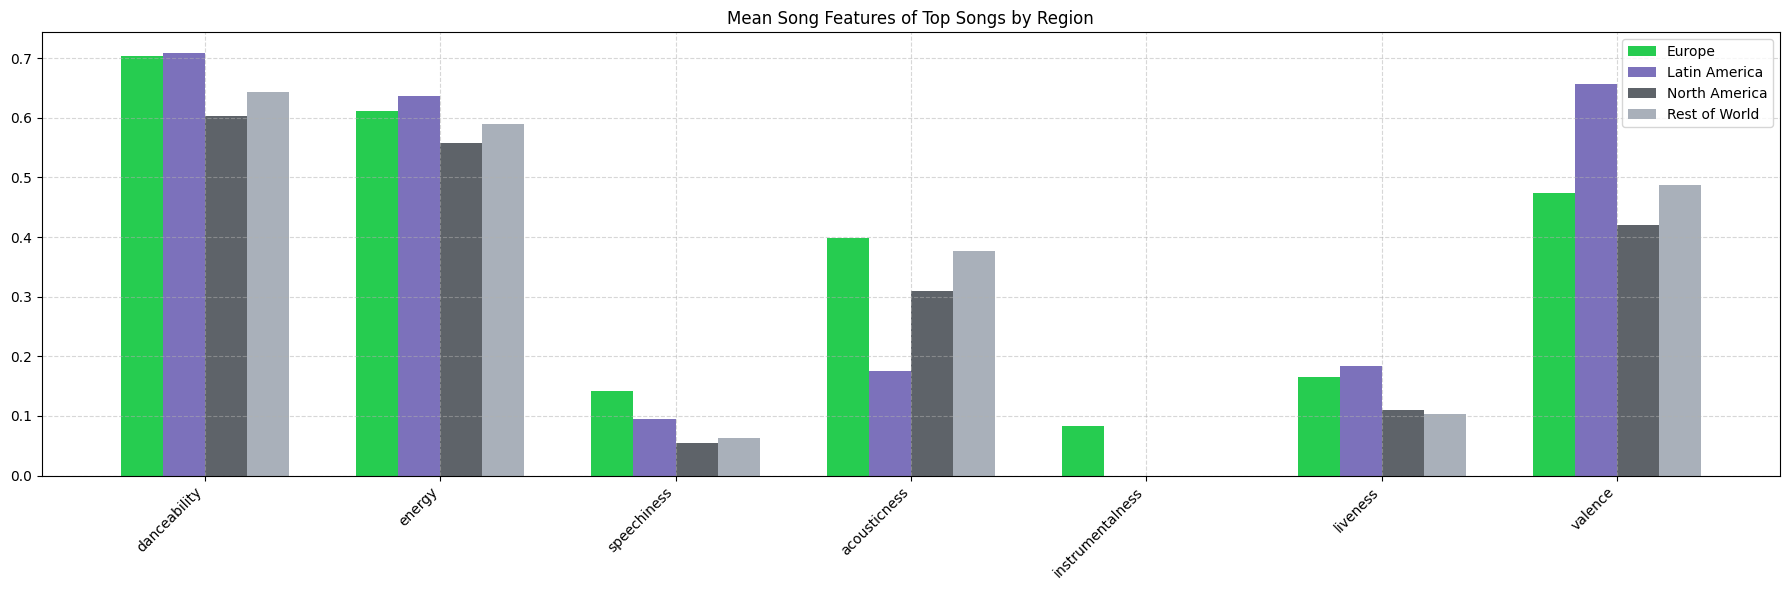

In [130]:
#Plotting mean audio features(that have values between 0-1) of top songs by region
EU_mean_features=top_eu__musicfeatures.describe().loc['mean','danceability':'valence']
LATAM_mean_features=top_LATAM_musicfeatures.describe().loc['mean','danceability':'valence']
NorthAm_mean_features=top_NorthAm_musicfeatures.describe().loc['mean','danceability':'valence']
Rest_mean_features=top_rest_musicfeatures.describe().loc['mean','danceability':'valence']

features = EU_mean_features.index  # Get feature names
regions = ['Europe', 'Latin America', 'North America','Rest of World']
values = [EU_mean_features, LATAM_mean_features, NorthAm_mean_features,Rest_mean_features]

#Bar plot for different features across different regions
colors=['#26CC50','#7C71BB','#5E6369',"#A9B0BA"]
fig, ax = plt.subplots(figsize=(18, 6))
bar_width = 0.25
group_padding = 0.4
num_features = len(features)
num_regions = len(regions)
index = np.arange(len(features))*(num_regions * bar_width + group_padding)# to ensure spacing between the groups

for i, region in enumerate(regions):
    ax.bar(index + i * bar_width, values[i], bar_width, label=region, color=colors[i])

ax.set_xticks(index + (num_regions - 1) * bar_width / 2)
ax.grid(alpha=0.5,linestyle='--')
ax.set_xticklabels(features, rotation=45, ha='right')
ax.set_title('Mean Song Features of Top Songs by Region', fontsize=12)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

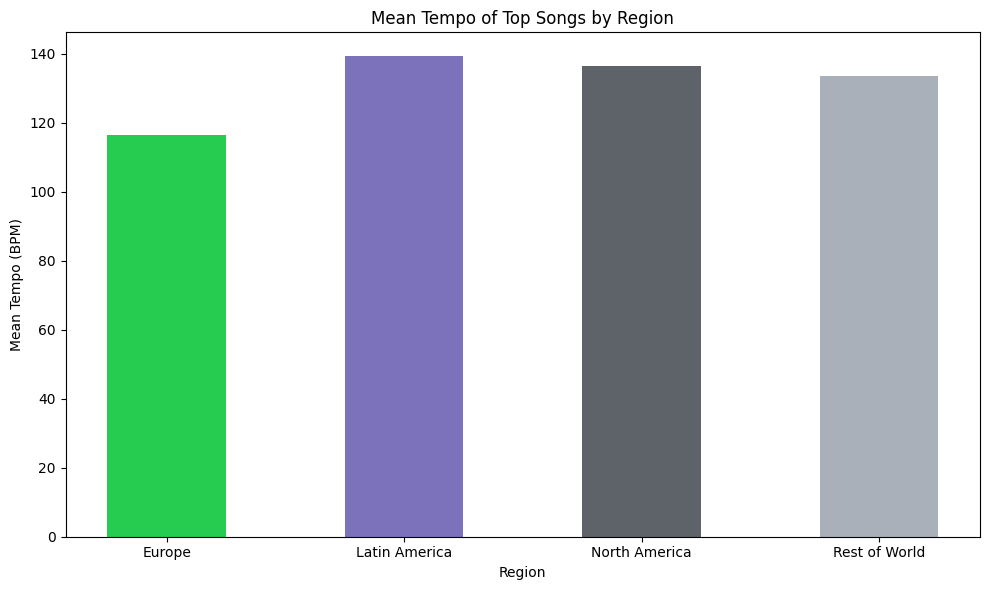

In [131]:
#Plotting mean tempo of top songs by region
tempo_NorthAm=top_NorthAm_musicfeatures.describe().loc['mean','tempo']
tempo_EU=top_eu__musicfeatures.describe().loc['mean','tempo']
tempo_LATAM=top_LATAM_musicfeatures.describe().loc['mean','tempo']
tempo_Rest=top_rest_musicfeatures.describe().loc['mean','tempo']

tempo_values = [tempo_EU,tempo_LATAM, tempo_NorthAm,tempo_Rest]


fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
regions = ['Europe', 'Latin America', 'North America','Rest of World']
colors=['#26CC50','#7C71BB','#5E6369',"#A9B0BA"]
bar_width = 0.5
index = np.arange(len(regions))
bars = ax.bar(index, tempo_values, bar_width, color=colors)


ax.set_xlabel('Region')
ax.set_ylabel('Mean Tempo (BPM)')
ax.set_title('Mean Tempo of Top Songs by Region', fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(regions)
plt.tight_layout()



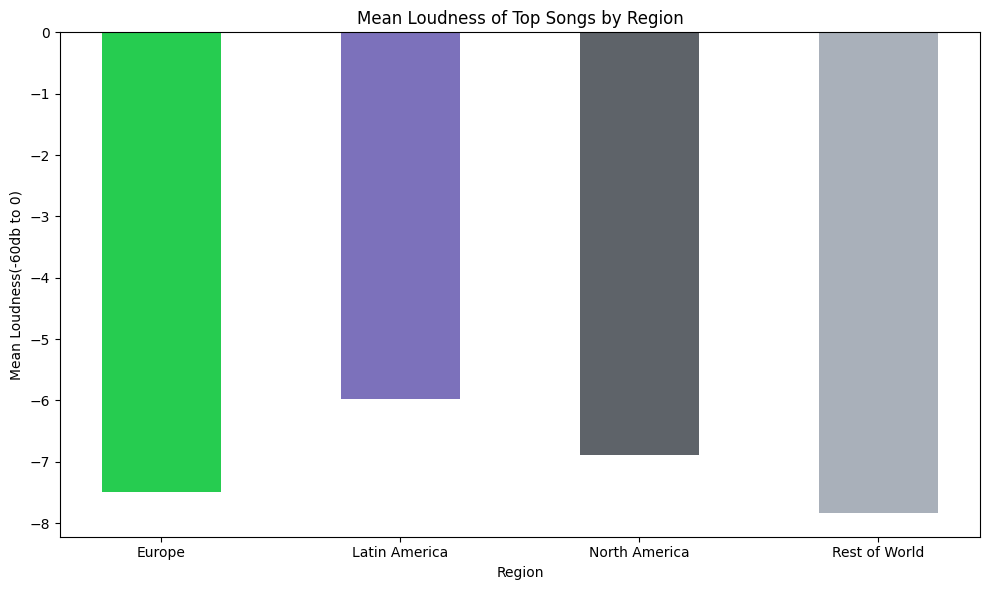

In [132]:
loud_NorthAm=top_NorthAm_musicfeatures.describe().loc['mean','loudness']
loud_EU=top_eu__musicfeatures.describe().loc['mean','loudness']
loud_LATAM=top_LATAM_musicfeatures.describe().loc['mean','loudness']
loud_Rest=top_rest_musicfeatures.describe().loc['mean','loudness']

loud_values = [loud_EU, loud_LATAM, loud_NorthAm, loud_Rest]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
regions = ['Europe', 'Latin America', 'North America','Rest of World']
colors=['#26CC50','#7C71BB','#5E6369',"#A9B0BA"]
bar_width = 0.5
index = np.arange(len(regions))
bars = ax.bar(index, loud_values, bar_width, color=colors)

# Add labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Mean Loudness(-60db to 0)')
ax.set_title('Mean Loudness of Top Songs by Region', fontsize=12)
ax.set_xticks(index)
ax.set_xticklabels(regions)
plt.tight_layout()


## RESULTS

Analysis conducted to determine **"How did music preferences vary across different regions (North America, Latin America, Europe, and the Rest of the World) on Spotify over the period from December 2023 to June 2024?"** resulted in the following findings:


- Daily rankings gives a ***better measurement of trend of music preference*** globally rather than popularity score as songs with 0 popularity score can be ranking 1.
- Daily ranking trends of top 5 songs in different regions show the following patterns:
  - In Europe, top songs that ranked high(1-10) in the winter months moved further down the ranking list after April.
  - In North American, top songs ranked low(>10) in December and between Jan and mid April held a consistent high rankings.
  - In Latin America and Rest of World regions,the rankings exhibit significant fluctuations.

- Top artists in each region whose songs ranked consistently less than 10 over the last 6 months:
  - Benson Boone(Europe, 1847 times)
  - Xavi(LATAM, 2458)
  - Noah Kahan(North America, 231)
  - Jimin(Rest of World, 1227)

- Music preferences according to audio features of most popular songs in each region:
  - **Danceable songs** are preferred highly in all regions especially in Europe and Latin America.
  - The **energy** levels are fairly similar across all regions, with Europe and Latin America showing slightly higher values.
  - Europe shows a slightly higher value of **speechiness** in comparison to other regions, indicating a slight preference for tracks with more spoken words.
  - Europe shows a slightly higher preference for **acoustic and instrumental** tracks.
  - North America and the Rest of the World show slightly higher values, indicating a minor preference for **live** performance elements in music.
  - Mean **valence** is highest in Latin America followed by rest of world and Europe, which indicates preference of positive or euphoric songs in these regions.
  - Latin America and North America prefer **faster-paced** music, while Europe favors slower-paced tracks. The Rest of the World falls in between but leans towards faster tempos.
  - Latin America prefers the **loudest** music, followed by North America and then Europe. The Rest of the World prefers the quietest tracks.














## NEXT ACTIONS



Based on above finding following actions can taken by :-

1.   Artists and Record Labels:

  - Tailored Releases: Customize music releases to match regional preferences
      - Latin America: Focus on energetic, upbeat tracks.
      - Europe: Emphasize danceable tracks with acoustic and instrumental elements.
      - North America: Balance energetic tracks with live performance appeal.
  - Timing of Releases: Plan major releases strategically
      - Europe: Before April to maintain high rankings.
      - North America: Between January and mid-April for stability.
  - Targeted Collaborations: Collaborate with local top artists to enhance market penetration.



2.   Spotify:
  - Algorithm Adjustments: Refine recommendation algorithms to reflect regional music tastes, focusing on tempo, loudness, and danceability.

  - Regional Playlists: Curate playlists that resonate with specific regional preferences, enhancing user engagement.

  - Seasonal Campaigns:Develop seasonal marketing campaigns aligned with regional music trends to optimize user interaction and satisfaction.

  - Conduct deeper analysis on why older songs are trending to improve recommendation accuracy and user engagement.

## ANNEX:*Dataset Columns and Parameters*

Detailed documentation in [Spotify for developers](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

**Track Attributes**

- **name**: The name of the track or song.
- **artist**: The name of the artist who performed the song.
- **album**: The name of the album the song belongs to.
- **duration_ms**: The duration of the song in milliseconds.
- **popularity**: A value between 0 and 100 that represents the track's popularity globally on Spotify, with higher values indicating greater popularity.

**Audio** **Features**

- **danceability**: A value between 0 and 1 that describes how suitable the track is for dancing, based on a combination of musical elements like tempo, rhythm stability, and beat strength.
- **energy**: A measure between 0 and 1 that represents the perceived intensity and activity of the track, with higher values indicating more energetic tracks.
- **key**: The estimated key that the track is in (e.g., 0 = C, 1 = C♯/D♭, 2 = D, etc.).
- **loudness**: The overall loudness of the track in decibels (dB), with higher values indicating louder tracks.
- **mode**: Indicates the modality (major or minor) of the track, with 0 = minor and 1 = major.
- **speechiness**: A value between 0 and 1 that detects the presence of spoken words in the track, with higher values indicating more spoken words.
- **acousticness**: A confidence measure between 0 and 1 of whether the track is acoustic, with higher values indicating a more acoustic sound.
- **instrumentalness**: A value between 0 and 1 that represents the likelihood that the track contains no vocals, with higher values indicating an instrumental track.
- **liveness**: A measure between 0 and 1 that detects the presence of an audience in the recording, with higher values indicating a live performance.
- **valence**: A measure between 0 and 1 that describes the musical positiveness conveyed by the track, with higher values indicating more positive or euphoric emotions.
- **tempo**: The overall estimated tempo of the track in beats per minute (BPM).
- **time_signature** : The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".